In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn
from tqdm import tqdm                  #this is used to detect infinite loops for debugging

In [5]:
'''
Class used to generate the environment for Cliff Walking example
'''
class Cliff_Walking:
    '''
    Constructor sets all the parameters needed to construct the environment for Cliff Walking example
    '''
    def __init__(self, size_x, size_y, epsilon):
        self.actions = [(-1,0),(1,0),(0,-1),(0,1)]
        self.size_x = size_x
        self.size_y = size_y
        self.epsilon = epsilon
        self.start = (size_x-1, 0)
        self.goal = (size_x-1, size_y-1)
        
    '''
    Returns index for given action from the array
    '''
    def actionToint(self,action):
        return self.actions.index(action)
        
    '''
    Function to give the next state given current state and action taken
    '''
    def getNextState(self, state, action):
        #add action and current state to get the new state
        new_state = tuple(np.array(state) + np.array(action))
        
        #return to current state we go out of the grid
        if(new_state[0] < 0 or new_state[1] < 0 or new_state[0] >= self.size_x or new_state[1] >= self.size_y):
            new_state = state
        
        #default rewards
        reward = -1
        
        #setting new_state to start and reward to -100 if we fall in the cliff
        if(new_state[0] == self.size_x-1 and new_state[1] >= 1 and new_state[1] < self.size_y-1):
            reward = -100
            new_state = self.start
            
        return new_state, reward
    
    '''
    Function to perform SARSA
    action_value gets updated as numpy arrays are mutable
    '''
    def sarsa(self, action_value, alpha):
        #set initial state
        state = self.start
        action = 999
        
        #selecting action using e-greedy policy
        if(random.random() < self.epsilon):
            action = np.random.choice([0,1,2,3])
            action = self.actions[action]
        else:
            #greedy action using action values
            values = action_value[state[0], state[1], : ]
            action = np.argmax(values)
            action = self.actions[action]
            
        total_rewards = 0
        #running infinite loop and generating a sequence
        while(True):
            #Getting next state and then next action from the next state using e-greedy
            new_state, reward = self.getNextState(state, action)
            new_action = 999
            if(random.random() < self.epsilon):
                new_action = np.random.choice([0,1,2,3])
                new_action = self.actions[new_action]
            else:
                #greedy action using action values
                values = action_value[new_state[0], new_state[1], : ]
                new_action = np.argmax(values)
                new_action = self.actions[new_action]
            
            #calculate total rewards
            total_rewards += reward
            
            #updaing action values using the update given for SARSA
            action_value[state[0], state[1], self.actionToint(action)] += alpha*(reward + action_value[new_state[0], new_state[1], self.actionToint(new_action)] - action_value[state[0], state[1], self.actionToint(action)])
            
            #updating current state and action
            state = new_state
            action = new_action    
            
            #stop when we reach goal
            if(state == self.goal):
                break
        return total_rewards
    
    '''
    Function to perform Q-Learining
    action_value gets updated as numpy arrays are mutable
    '''
    def qlearning(self, action_value, alpha):
        #set initial state
        state = self.start
        total_rewards = 0
        
        #running infinite loop and generating a sequence
        while(True):
            action = 999
            #selecting action from the current state using e-greedy
            if(random.random() < self.epsilon):
                action = np.random.choice([0,1,2,3])
                action = self.actions[action]
            else:
                values = action_value[state[0], state[1], : ]
                action = np.argmax(values)
                action = self.actions[action]
            
            #get next state and reward for action
            new_state, reward = self.getNextState(state, action)
            
            #calculate total_rewards
            total_rewards += reward
            
            #updating action values using update rule given in Q-Learning
            action_value[state[0], state[1], self.actionToint(action)] += alpha*(reward + np.max(action_value[new_state[0], new_state[1], :]) - action_value[state[0], state[1], self.actionToint(action)])
            
            #updating current state
            state = new_state
            
            #stop when we reach the goal
            if(state == self.goal):
                break
        return total_rewards
    
    '''
    Function to generate the sum of rewards vs episodes graph
    '''
    def figureSumRewards(self):
        episodes = 500
        runs = 500
        
        sarsa_rewards = np.zeros(episodes)
        qlearning_rewards = np.zeros(episodes)
        
        # running 500 episodes 500 times and averaging them to get a less chaotic graph
        for run in tqdm(range(runs)):
            action_values_sarsa = np.zeros((self.size_x, self.size_y, 4))
            action_values_qlearning = np.zeros((self.size_x, self.size_y, 4))
            for i in range(episodes):
                sarsa_rewards[i] += self.sarsa(action_values_sarsa, 0.5)
                qlearning_rewards[i] += self.qlearning(action_values_qlearning, 0.5)
                
        #averaging over runs
        sarsa_rewards /= runs
        qlearning_rewards /= runs
        
        plt.figure(figsize=(15,10))
        plt.plot(sarsa_rewards, label="SARSA")
        plt.plot(qlearning_rewards, label="Q-Learning")
        plt.xlabel("Episodes")
        plt.ylabel("Sum of rewards during episode")
        plt.ylim([-100,0])
        plt.legend(prop={"size":20})


100%|██████████| 500/500 [02:48<00:00,  2.96it/s]


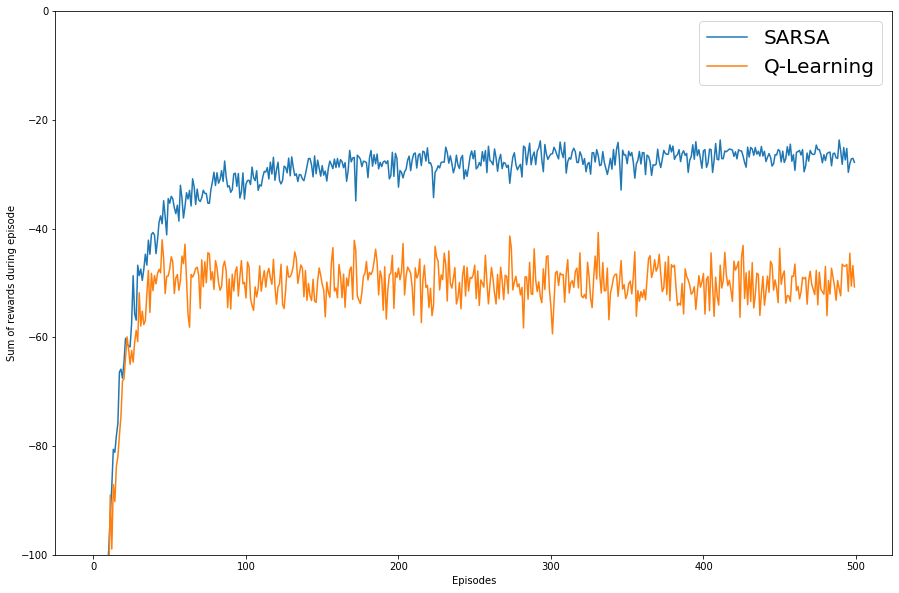

In [6]:
cliff = Cliff_Walking(4,12,0.1)
cliff.figureSumRewards()